# Lab | Feature extraction

# Instructions

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 1. Open the categoricals variable we created before.

In [71]:
categoricals = pd.read_csv('categorical.csv',index_col=0)

In [72]:
categoricals.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Sales Channel,Vehicle Class,Vehicle Size,Renew Offer Type_num,Year
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate,Agent,Two-Door Car,Medsize,1,2011
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal,Agent,Four-Door Car,Medsize,3,2011
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal,Agent,Two-Door Car,Medsize,1,2011
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate,Call Center,SUV,Medsize,1,2011
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal,Agent,Four-Door Car,Medsize,1,2011


In [73]:
categoricals.dtypes

State                   object
Response                object
Coverage                object
Education               object
EmploymentStatus        object
Gender                  object
Location Code           object
Marital Status          object
Policy Type             object
Policy                  object
Sales Channel           object
Vehicle Class           object
Vehicle Size            object
Renew Offer Type_num     int64
Year                     int64
dtype: object

In [74]:
categoricals['Renew Offer Type_num'] = categoricals['Renew Offer Type_num'].astype(str)

In [75]:
categoricals['Year'] = categoricals['Year'].astype(str)

In [76]:
categoricals.dtypes

State                   object
Response                object
Coverage                object
Education               object
EmploymentStatus        object
Gender                  object
Location Code           object
Marital Status          object
Policy Type             object
Policy                  object
Sales Channel           object
Vehicle Class           object
Vehicle Size            object
Renew Offer Type_num    object
Year                    object
dtype: object

# 2. Plot all the categorical variables with the proper plot. What can you see?

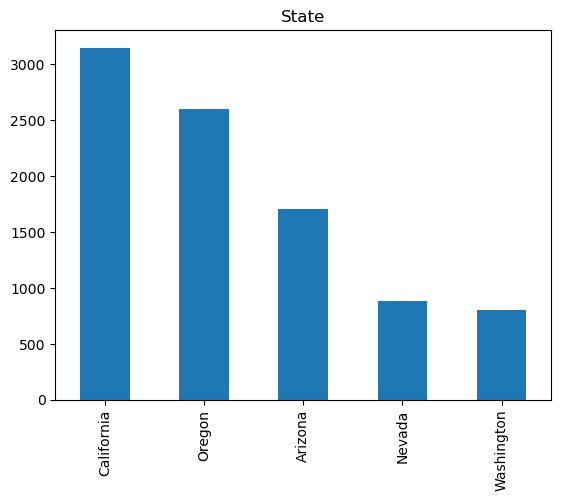

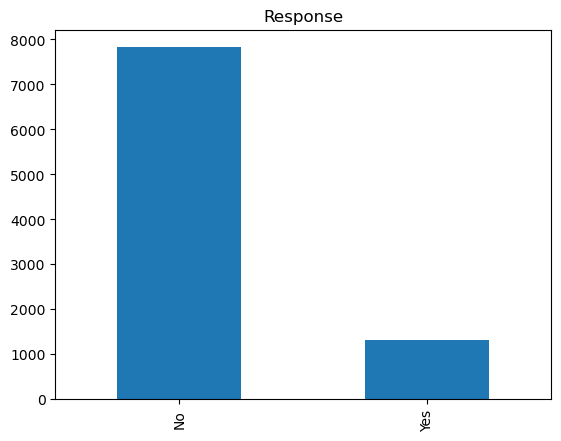

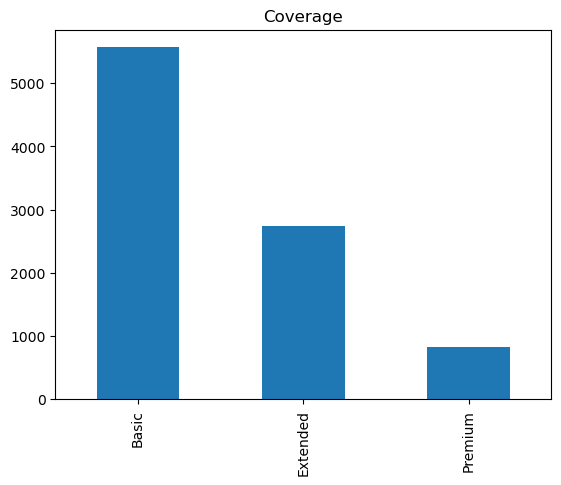

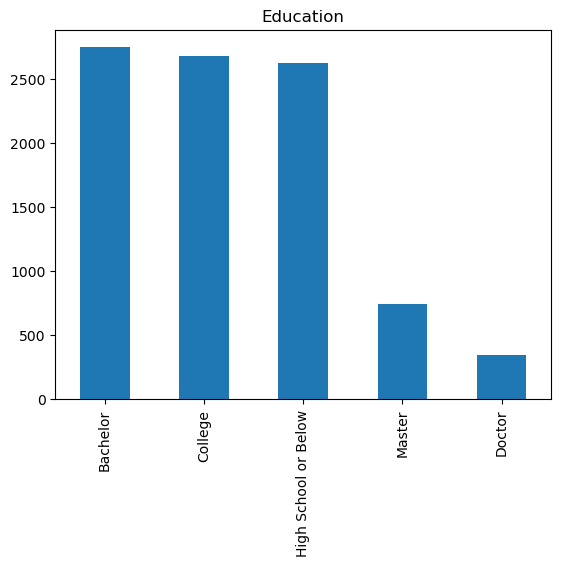

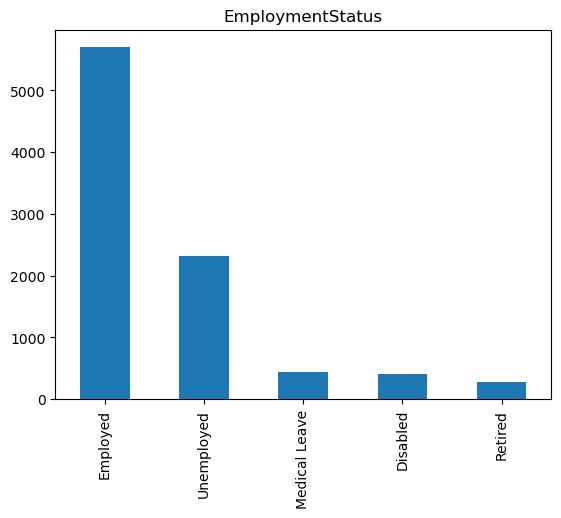

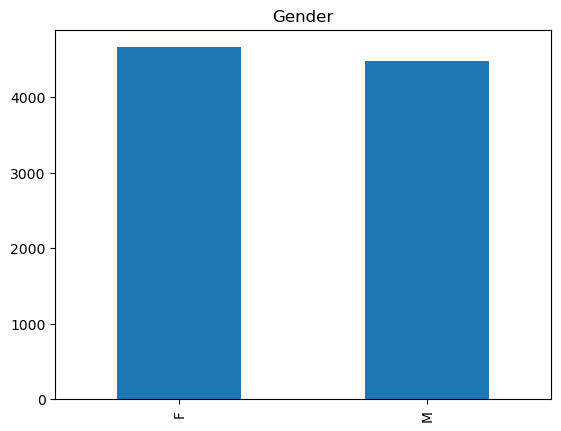

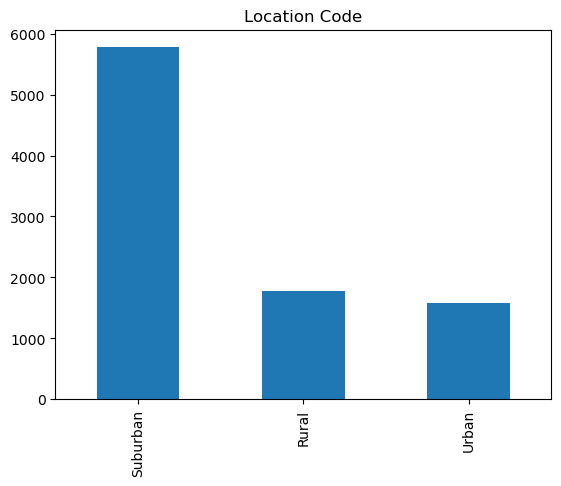

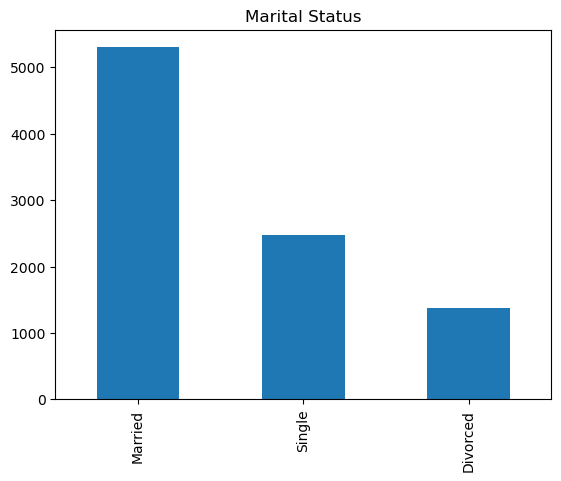

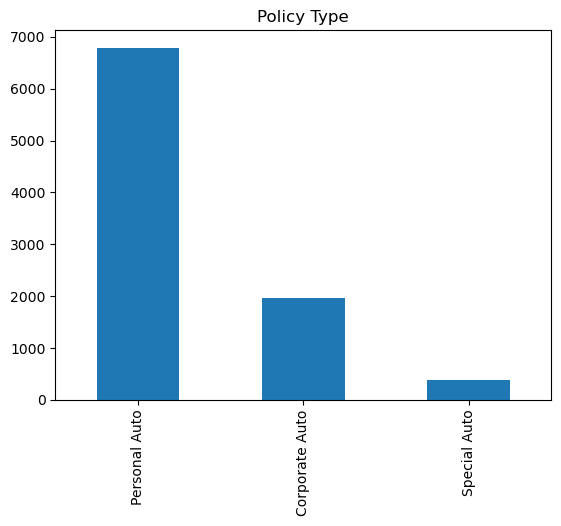

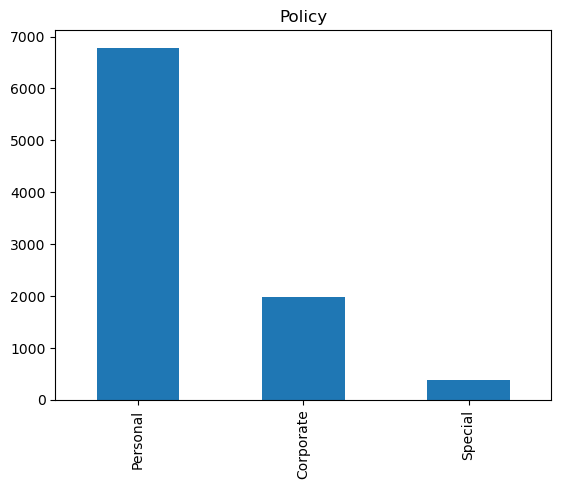

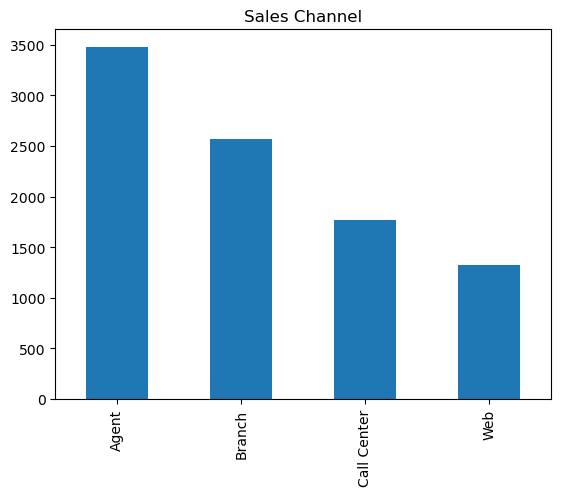

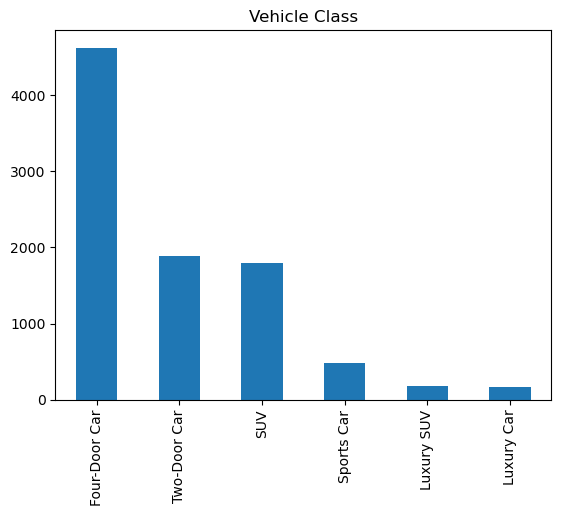

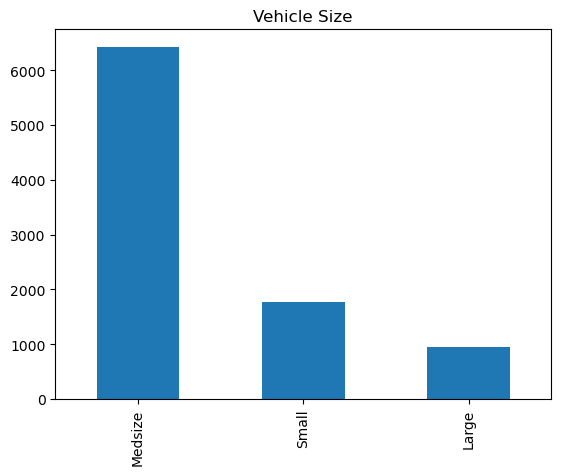

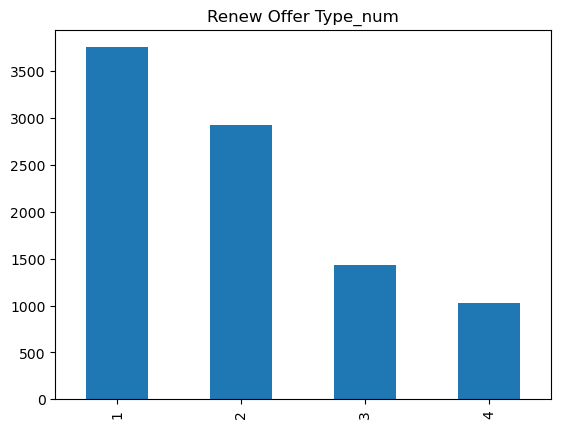

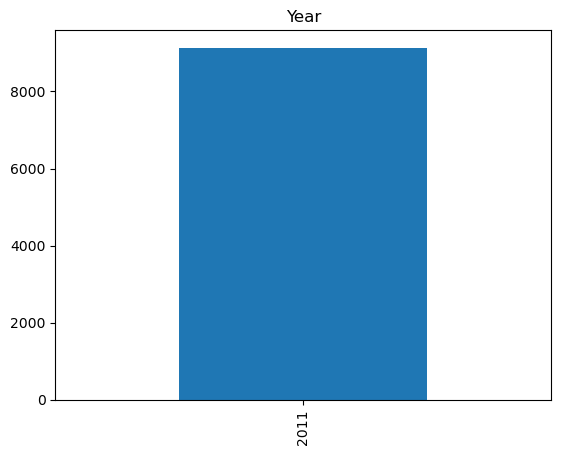

In [77]:
def plot_all_columns(df):
    for var in categoricals:
        plt.figure()
        categoricals[var].value_counts().plot(kind='bar')
        plt.title(var)
        plt.show()
plot_all_columns(categoricals)

# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [78]:
categoricals

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Sales Channel,Vehicle Class,Vehicle Size,Renew Offer Type_num,Year
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate,Agent,Two-Door Car,Medsize,1,2011
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal,Agent,Four-Door Car,Medsize,3,2011
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal,Agent,Two-Door Car,Medsize,1,2011
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate,Call Center,SUV,Medsize,1,2011
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal,Agent,Four-Door Car,Medsize,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal,Web,Four-Door Car,Medsize,2,2011
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate,Branch,Four-Door Car,Medsize,1,2011
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate,Branch,Four-Door Car,Medsize,1,2011
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal,Branch,Four-Door Car,Large,3,2011


In [79]:
categoricals.drop(['Policy'],axis=1,inplace=True)
categoricals.drop(['Renew Offer Type_num'],axis=1,inplace=True)

In [80]:
categoricals

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Sales Channel,Vehicle Class,Vehicle Size,Year
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Agent,Two-Door Car,Medsize,2011
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Agent,Four-Door Car,Medsize,2011
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Agent,Two-Door Car,Medsize,2011
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Call Center,SUV,Medsize,2011
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Agent,Four-Door Car,Medsize,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Web,Four-Door Car,Medsize,2011
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Branch,Four-Door Car,Medsize,2011
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Branch,Four-Door Car,Medsize,2011
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Branch,Four-Door Car,Large,2011


# 4. Plot time variable. Can you extract something from it?

In [81]:
effective_to_date = pd.read_csv('effective_to_date.csv',index_col=0)

In [82]:
effective_to_date

,Effective To Date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-02-03
...,...
9129,2011-02-10
9130,2011-02-12
9131,2011-02-06
9132,2011-02-03


In [83]:
merged_catgorical = pd.concat([categoricals, effective_to_date], axis=1)

In [84]:
merged_catgorical

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Sales Channel,Vehicle Class,Vehicle Size,Year,Effective To Date
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Agent,Two-Door Car,Medsize,2011,2011-02-24
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Agent,Four-Door Car,Medsize,2011,2011-01-31
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Agent,Two-Door Car,Medsize,2011,2011-02-19
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Call Center,SUV,Medsize,2011,2011-01-20
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Agent,Four-Door Car,Medsize,2011,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Web,Four-Door Car,Medsize,2011,2011-02-10
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Branch,Four-Door Car,Medsize,2011,2011-02-12
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Branch,Four-Door Car,Medsize,2011,2011-02-06
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Branch,Four-Door Car,Large,2011,2011-02-03


In [85]:
pattern = r"-\d{2}-"
re.findall(pattern,str(merged_catgorical['Effective To Date']))

['-02-',
 '-01-',
 '-02-',
 '-01-',
 '-02-',
 '-02-',
 '-02-',
 '-02-',
 '-02-',
 '-02-']

In [93]:
merged_catgorical['month'] = merged_catgorical['Effective To Date'].map(lambda x: re.findall(pattern,str(x))[0][1:-1] 
                if len(str(x)) > 1 else np.nan )

In [96]:
merged_catgorical.drop(['Effective To Date'],axis=1,inplace=True)

In [97]:
merged_catgorical.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Sales Channel,Vehicle Class,Vehicle Size,Year,month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Agent,Two-Door Car,Medsize,2011,02
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Agent,Four-Door Car,Medsize,2011,01
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Agent,Two-Door Car,Medsize,2011,02
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Call Center,SUV,Medsize,2011,01
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Agent,Four-Door Car,Medsize,2011,02


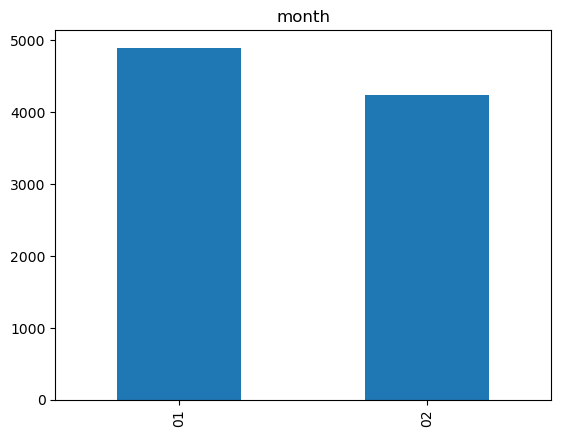

In [102]:
merged_catgorical['month'].value_counts().plot(kind='bar')
plt.title('month')
plt.show()